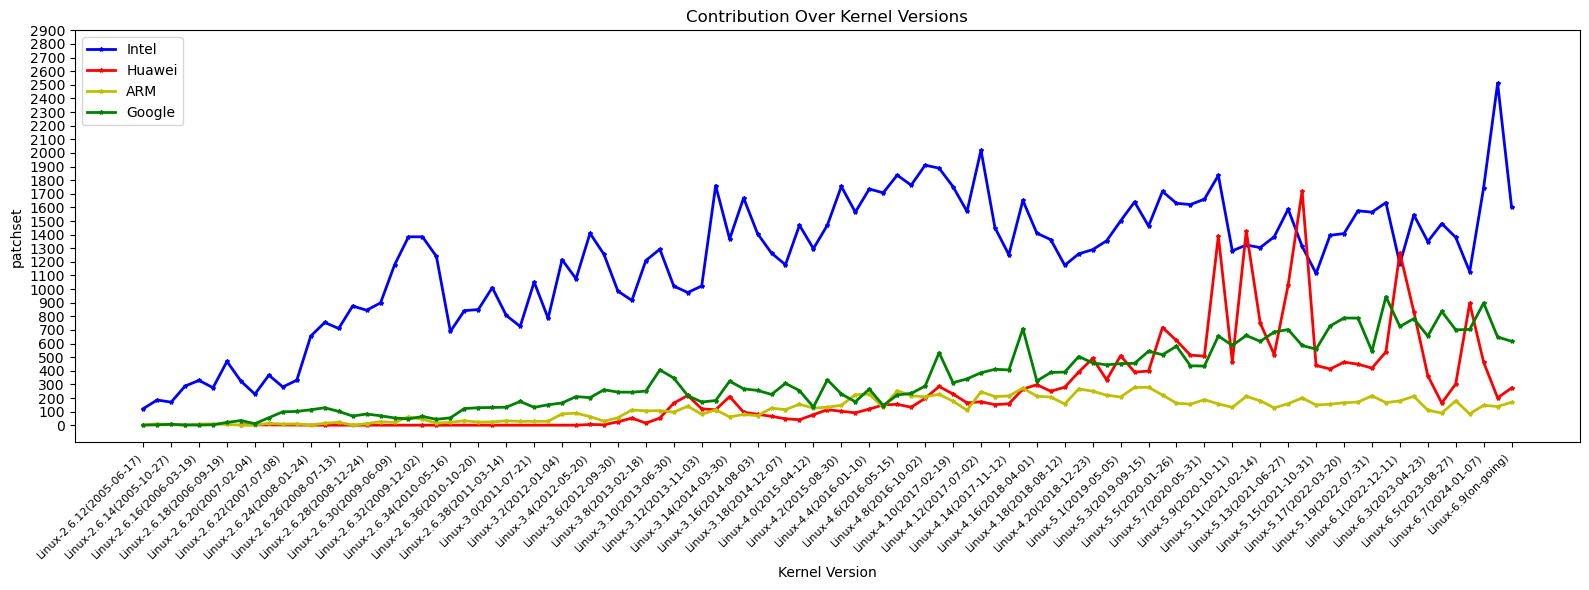

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('all_kernel_contribute_data.csv')

# 筛选 Intel 的贡献数据
intel_all = df[df['contributor'] == "Intel"]
intel_pure = intel_all[intel_all['kernelversion'] != 'From Apr. 16 2005']
intel_kernelversion = intel_pure['kernelversion']
intel_values = intel_pure['value']
# 对数据进行倒序排列
intel_kernelversion = intel_kernelversion[::-1]
intel_values = intel_values[::-1]


# 筛选 Huawei 的贡献数据
huawei_all = df[df['contributor'] == "Huawei"]
huawei_pure = huawei_all[huawei_all['kernelversion'] != 'From Apr. 16 2005']
huawei_kernelversion = huawei_pure['kernelversion']
huawei_values = huawei_pure['value']
# 对数据进行倒序排列
huawei_kernelversion = huawei_kernelversion[::-1]
huawei_values = huawei_values[::-1]

# 筛选 ARM 的贡献数据
arm_all = df[df['contributor'] == "ARM"]
arm_pure = arm_all[arm_all['kernelversion'] != 'From Apr. 16 2005']
arm_kernelversion = arm_pure['kernelversion']
arm_values = arm_pure['value']
# 对数据进行倒序排列
arm_kernelversion = arm_kernelversion[::-1]
arm_values = arm_values[::-1]

# 筛选 Google 的贡献数据
google_all = df[df['contributor'] == "Google"]
google_pure = google_all[google_all['kernelversion'] != 'From Apr. 16 2005']
google_kernelversion = google_pure['kernelversion']
google_values = google_pure['value']
# 对数据进行倒序排列
google_kernelversion = google_kernelversion[::-1]
google_values = google_values[::-1]

# 对数据进行倒序排列
google_kernelversion = google_kernelversion[::-1]
google_values = google_values[::-1]


# 创建图形对象，并设置合适的大小
plt.figure(figsize=(16, 6))  # 增大图形尺寸，给 x 轴更多空间

# 绘制数据
intel_line=plt.plot(intel_kernelversion, intel_values, '-*b', label='Intel', markersize=3, linewidth=2)

huawei_line=plt.plot(huawei_kernelversion, huawei_values, '-*r', label='Huawei', markersize=3, linewidth=2)
arm_line=plt.plot(arm_kernelversion, arm_values, '-*y', label='ARM', markersize=3, linewidth=2)
google_line=plt.plot(google_kernelversion, google_values, '-*g', label='Google', markersize=3, linewidth=2)


# 设置 x 和 y 轴刻度
plt.tick_params(axis='x', labelsize=8)  # 设置 x 轴的刻度标签大小
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴的刻度标签 45 度，确保标签清晰

# 显示所有 x 轴刻度标签的值（不跳过任何一个）
plt.xticks(range(0, len(intel_kernelversion), 2))  # 显示每个 x 轴刻度标签

# 设置 y 轴的刻度
plt.yticks(range(0, 3000, 100))  # y 轴从 100 到 3000，间隔为 100

# 添加图例、标签和标题
plt.xlabel('Kernel Version')  # x 轴标签
plt.ylabel('patchset')  # y 轴标签
plt.title('Contribution Over Kernel Versions')  # 图表标题
plt.legend(loc='best')  # 添加图例

# 自动调整布局，避免标签重叠
plt.tight_layout()

# 显示图形
plt.show()


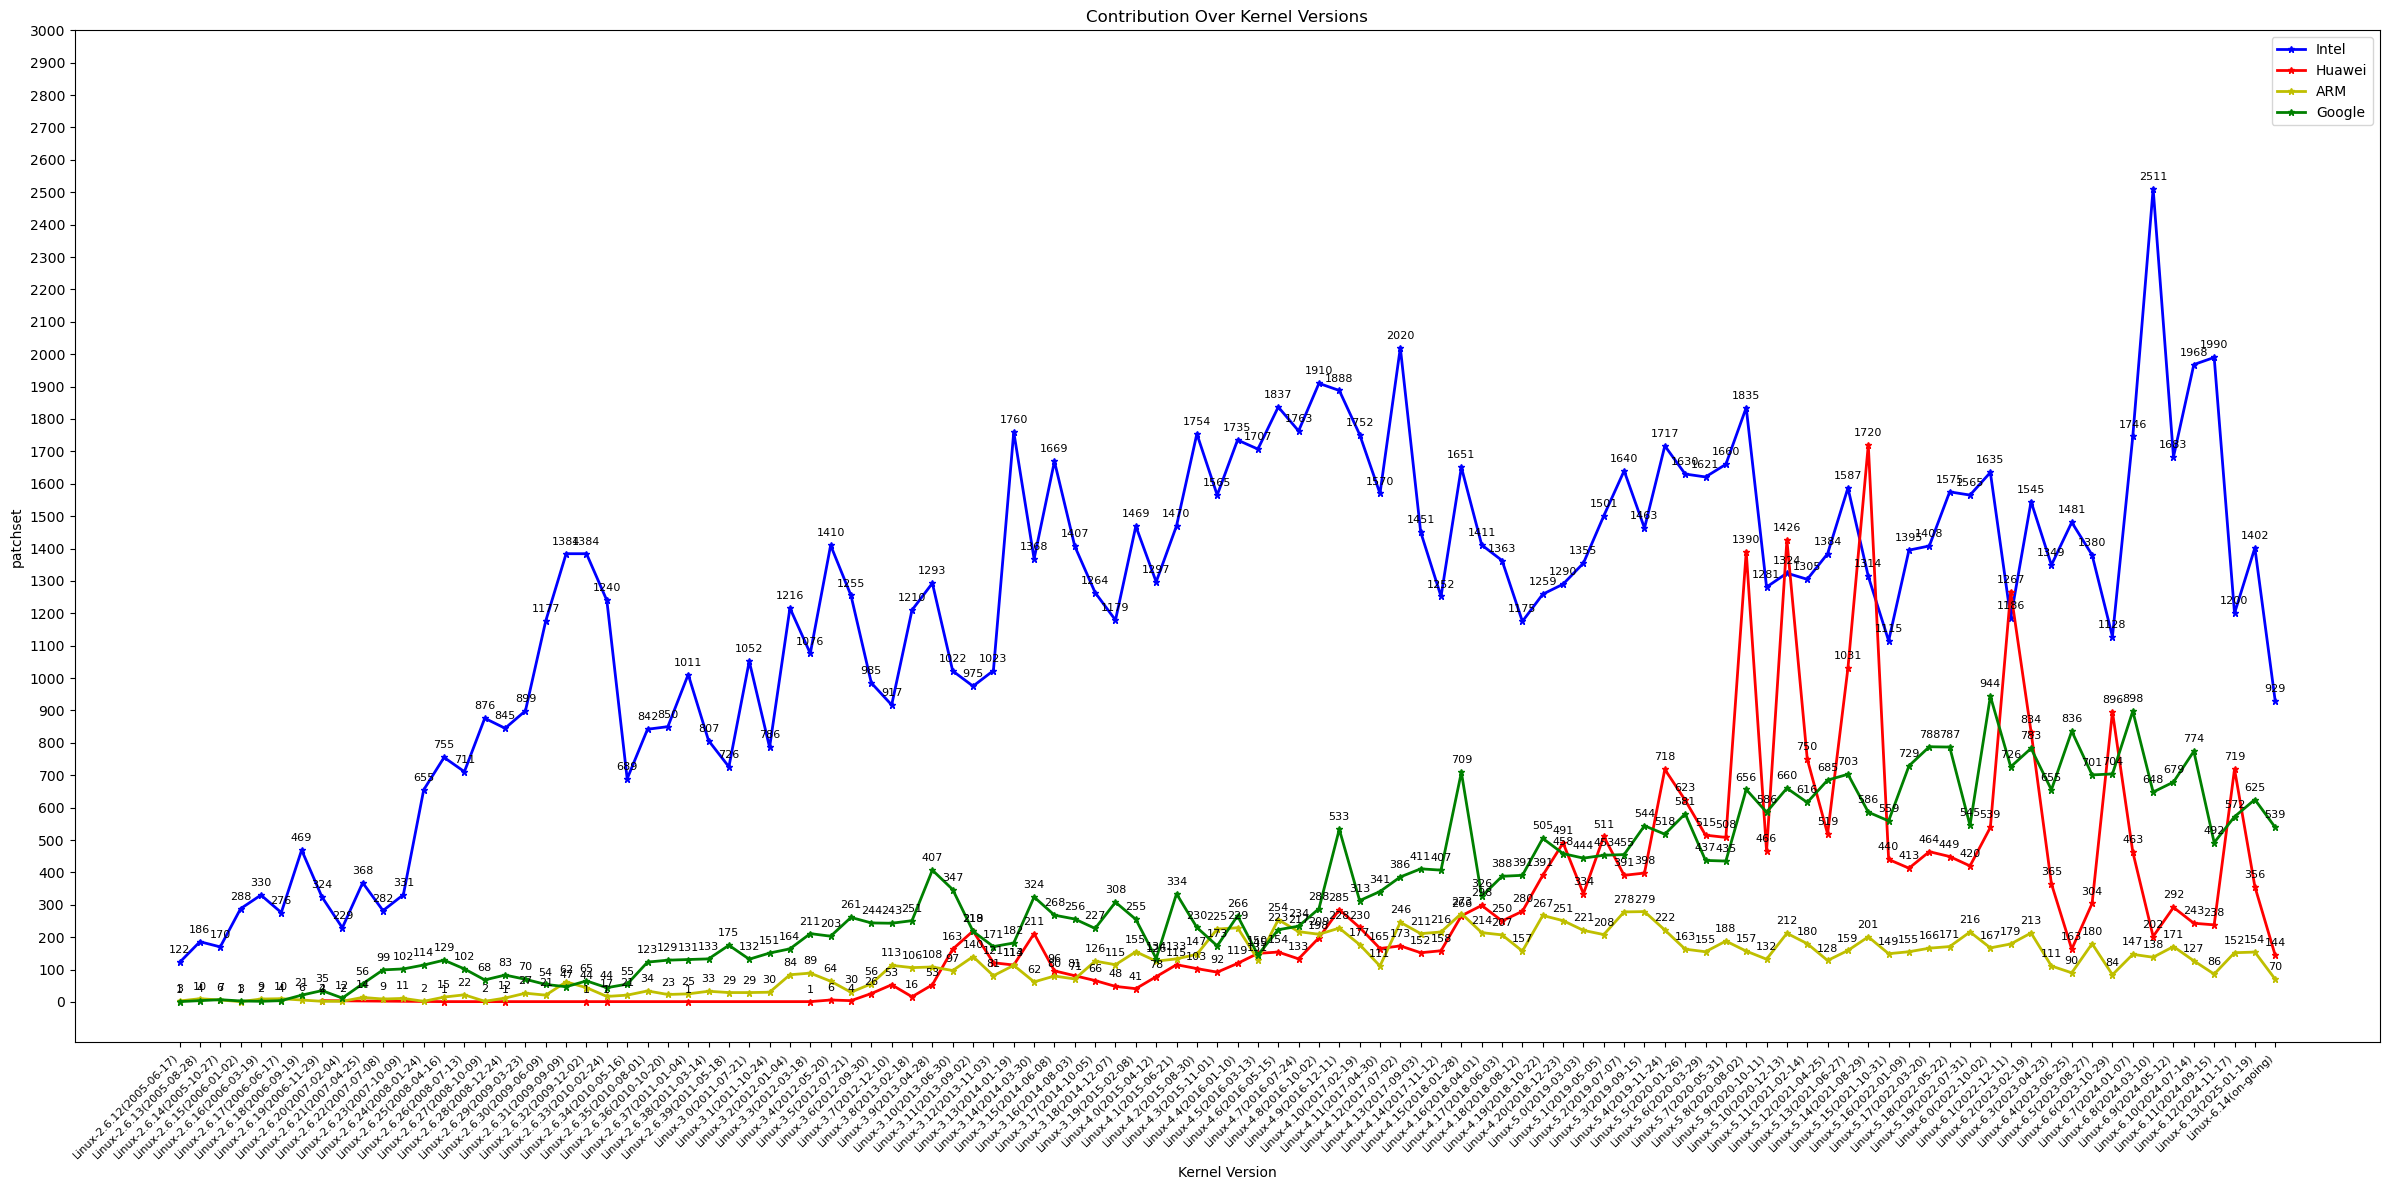

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('all_kernel_contribute_data_20250201.csv')

def plot_contributor(df, contributor, color, label):
    """绘制单个贡献者的折线图并添加数据点标签"""
    contributor_data = df[df['contributor'] == contributor]
    pure_data = contributor_data[contributor_data['kernelversion'] != 'From Apr. 16 2005']
    kernel_versions = pure_data['kernelversion'].tolist()[::-1] # 转换为列表并倒序
    values = pure_data['value'].tolist()[::-1] # 转换为列表并倒序

    line, = plt.plot(kernel_versions, values, '-*'+color, label=label, markersize=5, linewidth=2) # markersize 调大一点

    # 添加数据点标签
    for x, y in zip(kernel_versions, values):
        plt.annotate(str(y), xy=(x, y), xytext=(0, 5), # 调整 xytext 偏移量
                     textcoords="offset points", ha='center', va='bottom', fontsize=8) # 调整字体大小

    return line, kernel_versions, values

# 创建图形对象，并设置合适的大小
plt.figure(figsize=(24, 12))  # 增大 y 轴尺寸，避免标签重叠

# 绘制数据并获取kernelversion
intel_line, intel_kernelversion, intel_values = plot_contributor(df, "Intel", 'b', 'Intel')
huawei_line, huawei_kernelversion, huawei_values = plot_contributor(df, "Huawei", 'r', 'Huawei')
arm_line, arm_kernelversion, arm_values = plot_contributor(df, "ARM", 'y', 'ARM')
google_line, google_kernelversion, google_values = plot_contributor(df, "Google", 'g', 'Google')

# 设置 x 轴刻度
plt.tick_params(axis='x', labelsize=8)
# 使用所有kernelversion的集合作为xticks，避免缺失
all_kernelversion = sorted(list(set(intel_kernelversion + huawei_kernelversion + arm_kernelversion + google_kernelversion)))
plt.xticks(all_kernelversion, rotation=45, ha='right')

# 设置 y 轴的刻度
plt.yticks(range(0, max(max(intel_values), max(huawei_values), max(arm_values), max(google_values)) + 500, 100)) # y轴动态范围

# 添加图例、标签和标题
plt.xlabel('Kernel Version')
plt.ylabel('patchset')
plt.title('Contribution Over Kernel Versions')
plt.legend(loc='best')

# 自动调整布局，避免标签重叠
plt.tight_layout()

# 显示图形
plt.show()